# ENCRYPTED DATA PREDICTIVE MODEL - K NEAREST NEIGHBORS (KNN)

## 1. Imports/Readings

In [9]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

#Output of plotting commands is displayed inline, directly below the code cell that produced it
%matplotlib inline

In [10]:
#Read training data
df = pd.read_csv('Classified Data', index_col=0)

## 2. Data Understanding

In [11]:
#Returns the first n rows
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## 3. Data Cleaning/ First Aproach Of The Predictive Model

In [25]:
#Classify the parameters into a DataFrame for the training data
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS', axis=1))

#Normalized the DataFrame for the training data
df_normalized = scaler.transform(df.drop('TARGET CLASS', axis=1))

#Get the training data
df_param = pd.DataFrame(df_normalized, columns=df.columns[:-1])

#Split the data to train/testing
X_train, X_test, y_train, y_test = train_test_split(df_param, df['TARGET CLASS'], test_size=0.3)

#Parameterized KNN predictive model: nearest neighbor = 1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

#Return the classification report and the confusion matrix
#Classification report: 94% (high quality of the predictive model)
#Confusion matrix: 11 false positives (very acceptable number, since it's 11/301)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       141
           1       0.93      0.95      0.94       159

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

[[130  11]
 [  8 151]]


## 4. Elbow Method

Text(0, 0.5, 'Error rate')

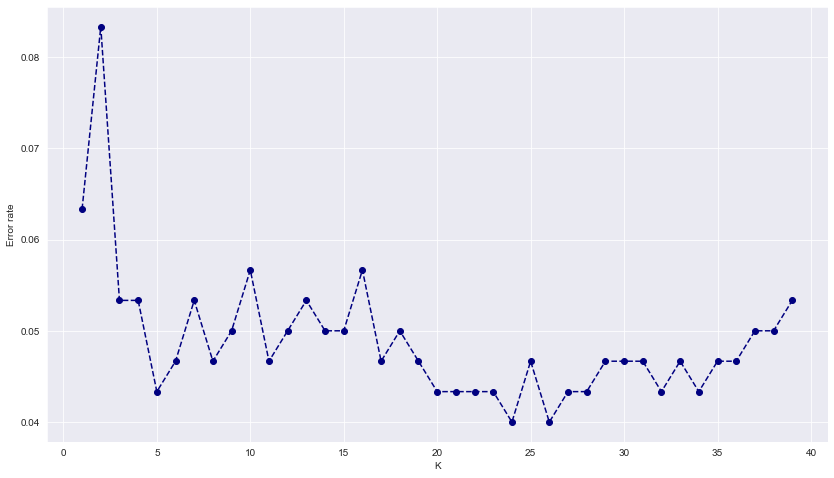

In [31]:
#Inicialize error_rate array
error_rate = []

#Loop for 40 different error_rates
for i in range(1, 40):
    knn = knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred!=y_test))
    
#Plot Error rate vs K: model converge to optimal solution for k=24
sns.set_style("darkgrid")
plt.figure(figsize=(14,8))
plt.plot(range(1,40), error_rate, color='navy', linestyle='dashed', marker='o')
plt.xlabel('K')
plt.ylabel('Error rate')

## 5. Optimized Predictive Model 

In [37]:
#Parameterized KNN predictive model: nearest neighbor = 24
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

#Return the classification report and the confusion matrix
#Classification report: 96% (top notch quality of the predictive model)
#Confusion matrix: 8 false positives (very acceptable number, since it's 8/301)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       141
           1       0.95      0.97      0.96       159

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

[[133   8]
 [  4 155]]
